In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from numpy.random import seed
from pandas import read_csv, DataFrame
from sklearn.preprocessing import minmax_scale
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten,Dense,Dropout,Activation
import numpy as np
import pandas as pd
import sys
import tensorflow as tf
from keras import * 
import keras 
print( keras.__version__)
from keras import backend as K
K.set_image_data_format('channels_last')
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from keras.metrics import binary_accuracy
from keras.metrics import categorical_accuracy

keras.backend.backend()
##keras.backend.image_dim_ordering()

2.9.0


'tensorflow'

In [ ]:

img_width, img_height = 200, 200


train_data_dir      = '/content/drive/My Drive/TRAIN1/'
validation_data_dir = '/content/drive/My Drive/TEST-1/'

batch_size = 2

In [ ]:
import time
start = time.time()

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
    
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape)) #(3,227, 227)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

end = time.time()
print(end - start)

0.3688216209411621


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True)

#batch_size = 10
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 539 images belonging to 2 classes.
Found 207 images belonging to 1 classes.


In [ ]:
import time
start = time.time()

model.fit_generator(train_generator,
                        steps_per_epoch=10,
                        epochs=20,
                        validation_data=validation_generator)

end = time.time()
print(end - start)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


10/10 [==============================] - 9s 872ms/step - loss: 0.8227 - accuracy: 0.4500 - val_loss: 0.7151 - val_accuracy: 0.0000e+00
Epoch 2/20
10/10 [==============================] - 9s 915ms/step - loss: 0.6931 - accuracy: 0.6500 - val_loss: 0.7870 - val_accuracy: 0.0000e+00
Epoch 3/20
10/10 [==============================] - 9s 997ms/step - loss: 0.6895 - accuracy: 0.7000 - val_loss: 0.7598 - val_accuracy: 0.0000e+00
Epoch 4/20
10/10 [==============================] - 9s 847ms/step - loss: 0.6888 - accuracy: 0.6500 - val_loss: 0.7802 - val_accuracy: 0.0000e+00
Epoch 5/20
10/10 [==============================] - 10s 1s/step - loss: 0.7189 - accuracy: 0.6500 - val_loss: 0.7864 - val_accuracy: 0.0000e+00
Epoch 6/20
10/10 [==============================] - 9s 948ms/step - loss: 0.6901 - accuracy: 0.5000 - val_loss: 0.7234 - val_accuracy: 0.0000e+00
Epoch 7/20
10/10 [==============================] - 9s 938ms/step - loss: 0.6920 - accuracy: 0.5500 - val_loss: 0.7113 - val_accuracy: 0.

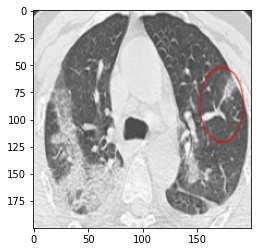

1/1 [==============================] - 0s 171ms/step
[0.5043298]
covid_19
0.5804996490478516


In [ ]:
from skimage.io import imread
from skimage.transform import resize
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

import cv2
import numpy as np

import time
start = time.time()

img = imread('/content/drive/My Drive/TEST-1/TEST/COVID_19/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89_1.png')
img = resize(img,(200, 200))
plt.imshow(img)
plt.show()

test_img = cv2.imread('/content/drive/My Drive/TEST-1/TEST/COVID_19/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89_1.png')
test_img = cv2.resize(test_img, (200, 200),
               interpolation = cv2.INTER_NEAREST)

test_img = test_img.reshape((1,200,200,3))

Y = model.predict(test_img)[0]
print(Y)

#val = np.argmax(Y)
if(Y >= 0.5):
    print("covid_19")
else:
    print("non-covid_19")

end = time.time()
print(end - start)

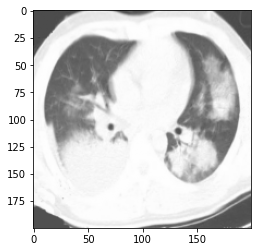

1/1 [==============================] - 0s 87ms/step
[0.50446916]
covid_19
0.4268960952758789


In [ ]:
from skimage.io import imread
from skimage.transform import resize
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

import cv2
import numpy as np

import time
start = time.time()

img = imread('/content/drive/My Drive/TEST-1/TEST/NON_COVID/2_2.jpg')
img = resize(img,(200, 200))
plt.imshow(img)
plt.show()

test_img = cv2.imread('/content/drive/My Drive/TEST-1/TEST/NON_COVID/2_2.jpg')
test_img = cv2.resize(test_img, (200, 200),
               interpolation = cv2.INTER_NEAREST)

test_img = test_img.reshape((1,200,200,3))

Y = model.predict(test_img)[0]
print(Y)

#val = np.argmax(Y)
if(Y >= 0.5):
    print("covid_19")
else:
    print("non-covid_19")

end = time.time()
print(end - start)